# Object Detection using MobileNet SSD

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Function declaration
Jupyter Notebook 및 Google Colab에서 이미지를 표시할 수 있도록 Function으로 정의

In [3]:
def img_show(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

### Load Model

In [4]:
prototxt_path = 'model/MobileNetSSD_deploy.prototxt.txt'
model_path = 'model/MobileNetSSD_deploy.caffemodel'

net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

In [5]:
# MobileNet SSD Model에 학습된 Class
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat", 
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]

LABEL_COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

### Load Image

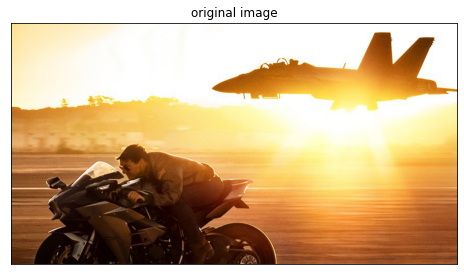

In [6]:
cv2_image = cv2.imread('asset/images/topgun.jpg', cv2.IMREAD_COLOR)
img_show('original image', cv2_image)

### Object detections

In [7]:
(h, w) = cv2_image.shape[:2]
resized = cv2.resize(cv2_image, (300, 300))
blob = cv2.dnn.blobFromImage(resized, 0.007843, (300, 300), 127.5)

In [8]:
net.setInput(blob)
detections = net.forward()

In [13]:
conf = 0.2

In [14]:
vis = cv2_image.copy()

# 추출된 영역을 반복 수행 confidence 값이 임계치를 넘는 경우만 표시
for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > conf:
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        
        print("[INFO] {} : [ {:.2f} % ]".format(CLASSES[idx], confidence * 100))
        
        cv2.rectangle(vis, (startX, startY), (endX, endY), LABEL_COLORS[idx], 1)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(vis, "{} : {:.2f}%".format(CLASSES[idx], confidence * 100), (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, LABEL_COLORS[idx], 2)

[INFO] person : [ 99.29 % ]
[INFO] motorbike : [ 97.91 % ]
[INFO] aeroplane : [ 26.47 % ]


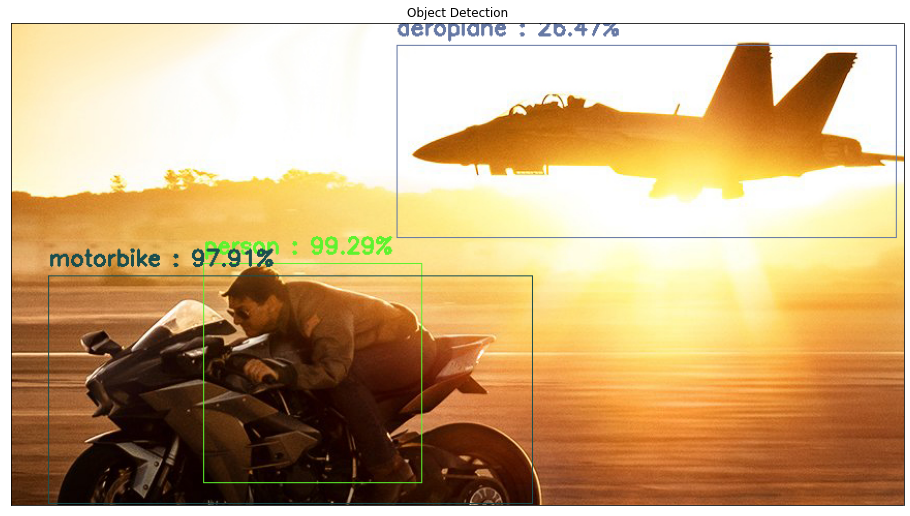

In [15]:
img_show('Object Detection', vis, figsize=(16,10))

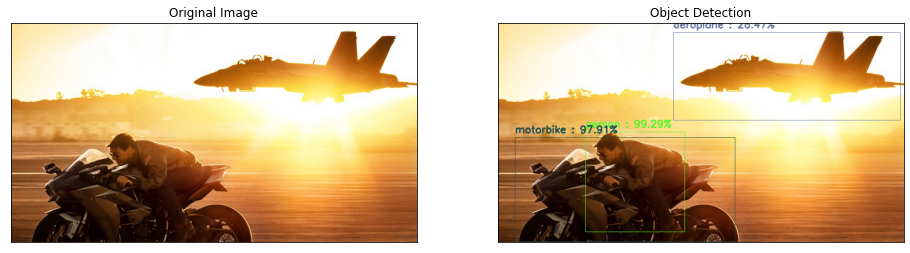

In [16]:
img_show(['Original Image', 'Object Detection'], [cv2_image, vis], figsize=(16,10))